In this notebook, we are going to discuss a discrete event simulation. We are going to simulate a case below:

Air Secure wishes to open a number of new service desks, guaranteeing that in the long run 90% of their customers do not have to wait longer than 8 minutes in a waiting queue before they are served. Preliminary research by Air Secure showed that on arrival customers always choose the smallest queue and remain there until served. This research also investigated the passengers inter-arrival time (in minutes) and the service time. The results are summarized in data.csv.

The problem that we are going to solve is as follow:

How many service desks should be minimally available to meet the service requirements? Namely, how many service desks should be available such that in the long run 90% of their customers do not have to wait longer than 8 minutes in a waiting queue before they are served. Speciﬁcally, run the simulation for T = 3000 units of time. Discard the ﬁrst 30% of the samples and use N = 50 batches to estimate the probability that a customer waits less than 8 minutes before entering the service.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Before performing the discrete event simulation, let's explore our data.
eventData = pd.read_csv('data.csv')

The distribution of $inter \ arrival \ time$ and $service \ time$ is as follows:

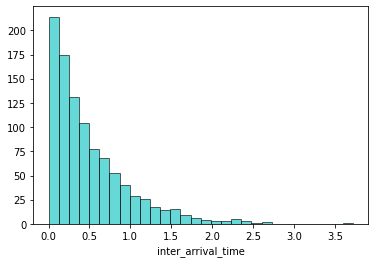

In [3]:
plt.figure()
plt.hist(eventData['inter_arrival_time'], bins = 30, color = 'c', edgecolor = 'k', alpha = 0.6)
plt.xlabel('inter_arrival_time')
plt.show()

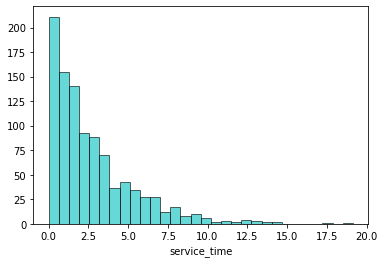

In [4]:
plt.figure()
plt.hist(eventData['service_time'], bins = 30, color = 'c', edgecolor = 'k', alpha = 0.6)
plt.xlabel('service_time')
plt.show()

In [5]:
# Function for batch
def batch(seq):
    avg = len(seq) / float(50)
    out = []
    last = 0.0

    while last < len(seq):
        out.append(seq[int(last):int(last + avg)])
        last += avg

    return out

# Function to calculate the mean and confidence interval of waiting time using
# waiting time usingBatch Method
def meanBatch(data, queue):
    Q = []
    q = batch(data)
    for i in q:
        Q.append(np.mean(i))
    
    meanQ = np.mean(Q)
    stdQ = np.std(Q)/np.sqrt(len(Q))
    print('The average waiting time on Queue', queue, 'is', meanQ,'with 90% CI :', meanQ - 1.645*stdQ, 'to',meanQ + 1.645*stdQ)

In [6]:
# Function to calculate the mean and confidence interval percentage of
# customers that have waiting time less or equal to 8 minutes
# usingBatch Method
def meanwaittime(data):
    Q = []
    q = batch(data)
    for i in q:
        less8 = list(filter(lambda x: x <= 8, i))
        wait = len(less8)/len(i)
        Q.append(wait)
        
    meanQ = np.mean(Q)
    stdQ = np.std(Q)/np.sqrt(len(Q))
    #print('The average number of customers waiting less than 8 minutes is', 
    #      meanQ,'with 90% CI :', meanQ - 1.645*stdQ, 'to',meanQ + 1.645*stdQ)
    print('The average number of customers waiting less than 8 minutes is', 
          meanQ,'with range :', min(Q), 'to',max(Q))

One desk is clearly not enough in this case, since inter-arrival time value is much lower than service desk time. Hence, let's start the DES by setting number of desks equal to 4.

<font color = 'F2607A'>
    
# DES with #Service_Desk = 4

The average waiting time on Queue 1 is 488.7055731128725 with 90% CI : 451.4832189897602 to 525.9279272359848
The average waiting time on Queue 2 is 496.9076590834447 with 90% CI : 458.6162104767705 to 535.1991076901189
The average waiting time on Queue 3 is 478.247250185087 with 90% CI : 435.82071754804144 to 520.6737828221326
The average waiting time on Queue 4 is 500.5805757791349 with 90% CI : 465.7777792304345 to 535.3833723278353
The average waiting time on Queue All Queue is 493.4175765633034 with 90% CI : 457.8705037853358 to 528.964649341271


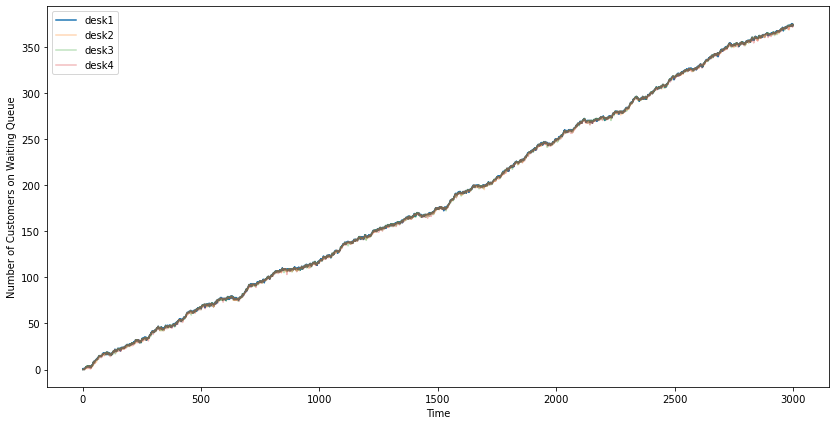

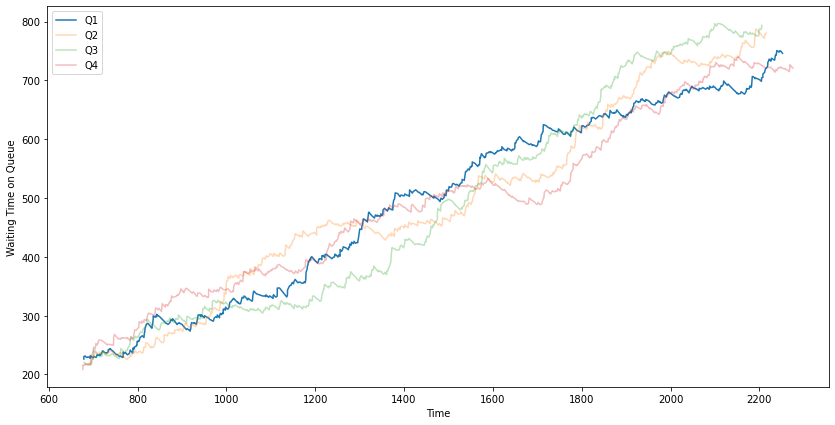

In [8]:
import heapq


#############################################################

class SimData:
    
    def __init__(self,time_arrive, event_type, serv_1_start, serv_1_end, serv_2_start, 
                 serv_2_end, serv_3_start, serv_3_end, serv_4_start, serv_4_end):
        self.m_time_arrive = time_arrive
        self.m_event_type = event_type
        self.m_serv_1_start = serv_1_start
        self.m_serv_1_end = serv_1_end
        self.m_serv_2_start = serv_2_start
        self.m_serv_2_end = serv_2_end
        self.m_serv_3_start = serv_3_start
        self.m_serv_3_end = serv_3_end
        self.m_serv_4_start = serv_4_start
        self.m_serv_4_end = serv_4_end
        
    def Print(self):
        print(self.m_time_arrive," (", self.m_event_type,  ") : "
              ", ",self.m_serv_1_start, " - ", self.m_serv_1_end,
              ", ",self.m_serv_2_start, " - ", self.m_serv_2_end,
              ", ",self.m_serv_3_start, " - ", self.m_serv_3_end,
              ", ",self.m_serv_4_start, " - ", self.m_serv_4_end)

#############################################################

T = 3000 # simulation time

# Creating a list to store event for desk 1,2,3, and 4
ell1 = []
ell2 = []
ell3 = []
ell4 = []

priorityQueue = [] 

# Creating a list to store queue 1,2,3, and 4
Queue1 = []
Queue2 = []
Queue3 = []
Queue4 = []

# Storing array of inter-arrival time and service desk time. These variables will
# later be randomly sampled to define inter-arrival time and service time on DES
arrive = eventData['inter_arrival_time'].values
service = eventData['service_time'].values

t_current = 0

# create first arrival
t_current = np.random.choice(arrive,1)  
data = SimData(t_current,"ARRIVAL",-1,-1,-1,-1,-1,-1,-1,-1)
heapq.heappush(priorityQueue,(t_current,data))

# Create a list to store arriving time and queue length over time for all queues
time_arr = []
ellq1_len = []
ellq2_len = []
ellq3_len = []
ellq4_len = []

# Specifying all desks are not busy at the begining
serv1busy = 0
serv2busy = 0
serv3busy = 0
serv4busy = 0

# main loop
while(t_current<T):
    obj = heapq.heappop(priorityQueue)
    t_current = obj[0]
    event = obj[1]
    
    # record queus length
    time_arr.append(t_current)
    ellq1_len.append(len(Queue1))
    ellq2_len.append(len(Queue2))
    ellq3_len.append(len(Queue3))
    ellq4_len.append(len(Queue4))
    
    if(event.m_event_type == "ARRIVAL"):
        # handle arrival
        # schedule the next arrival
        t_next = t_current + float(np.random.choice(arrive,1)) 
        data = SimData(t_next,"ARRIVAL",-1,-1,-1,-1,-1,-1,-1,-1)
        heapq.heappush(priorityQueue,(t_next,data))
        
        # Every customer that arrives will choose the shortest queue
        # That's why if-else function
        if len(Queue1) == min([len(Queue1),len(Queue2),len(Queue3), len(Queue4)]):
            if(serv1busy==0):
                serv1busy = 1
                event.m_serv_1_start = t_current
                event.m_serv_1_end = t_current + float(np.random.choice(service,1))
                event.m_event_type = "DEPARTURE_SERV1"
                heapq.heappush(priorityQueue,(event.m_serv_1_end,event))            
            else:
                Queue1.append(event)
            continue
        elif  len(Queue2) == min([len(Queue1),len(Queue2),len(Queue3), len(Queue4)]):
            if(serv2busy==0):
                serv2busy = 1
                event.m_serv_2_start = t_current
                event.m_serv_2_end = t_current + float(np.random.choice(service,1))
                event.m_event_type = "DEPARTURE_SERV2"
                heapq.heappush(priorityQueue,(event.m_serv_2_end,event))            
            else:
                Queue2.append(event)
            continue
        elif  len(Queue3) == min([len(Queue1),len(Queue2),len(Queue3), len(Queue4)]):
            if(serv3busy==0):
                serv3busy = 1
                event.m_serv_3_start = t_current
                event.m_serv_3_end = t_current + float(np.random.choice(service,1))
                event.m_event_type = "DEPARTURE_SERV3"
                heapq.heappush(priorityQueue,(event.m_serv_3_end,event))            
            else:
                Queue3.append(event)
            continue
        elif  len(Queue4) == min([len(Queue1),len(Queue2),len(Queue3), len(Queue4)]):
            if(serv4busy==0):
                serv4busy = 1
                event.m_serv_4_start = t_current
                event.m_serv_4_end = t_current + float(np.random.choice(service,1))
                event.m_event_type = "DEPARTURE_SERV4"
                heapq.heappush(priorityQueue,(event.m_serv_4_end,event))            
            else:
                Queue4.append(event)
            continue          
        
    if(event.m_event_type == "DEPARTURE_SERV1"):
        ell1.append(event)
        serv1busy = 0
        # handle departure from the first queue
        if(len(Queue1)!=0):
            obj_wait_inq1 = Queue1.pop(0)
            obj_wait_inq1.m_serv_1_start = t_current
            obj_wait_inq1.m_event_type = "DEPARTURE_SERV1"
            obj_wait_inq1.m_serv_1_end = t_current + float(np.random.choice(service,1))
            heapq.heappush(priorityQueue,(obj_wait_inq1.m_serv_1_end,obj_wait_inq1))
            serv1busy = 1
        continue

    if(event.m_event_type == "DEPARTURE_SERV2"):
        ell2.append(event) 
        serv2busy = 0
        # handle departure from the second queue
        if(len(Queue2)!=0):
            obj_wait_inq2 = Queue2.pop(0)
            obj_wait_inq2.m_serv_2_start = t_current
            obj_wait_inq2.m_event_type = "DEPARTURE_SERV2"
            obj_wait_inq2.m_serv_2_end = t_current + float(np.random.choice(service,1))
            heapq.heappush(priorityQueue,(obj_wait_inq2.m_serv_2_end,obj_wait_inq2))
            serv2busy = 1
        continue
        
    if(event.m_event_type == "DEPARTURE_SERV3"):
        ell3.append(event) 
        serv3busy = 0
        # handle departure from the third queue
        if(len(Queue3)!=0):
            obj_wait_inq3 = Queue3.pop(0)
            obj_wait_inq3.m_serv_3_start = t_current
            obj_wait_inq3.m_event_type = "DEPARTURE_SERV3"
            obj_wait_inq3.m_serv_3_end = t_current + float(np.random.choice(service,1))
            heapq.heappush(priorityQueue,(obj_wait_inq3.m_serv_3_end,obj_wait_inq3))
            serv3busy = 1
        continue

    if(event.m_event_type == "DEPARTURE_SERV4"):
        ell4.append(event) 
        serv4busy = 0
        # handle departure from the fourth queue
        if(len(Queue4)!=0):
            obj_wait_inq4 = Queue4.pop(0)
            obj_wait_inq4.m_serv_4_start = t_current
            obj_wait_inq4.m_event_type = "DEPARTURE_SERV4"
            obj_wait_inq4.m_serv_4_end = t_current + float(np.random.choice(service,1))
            heapq.heappush(priorityQueue,(obj_wait_inq4.m_serv_4_end,obj_wait_inq4))
            serv4busy = 1
        continue

        
####################################################################################
# Calculate the average waiting time in the system
####################################################################################

# Calculate system burn-in, in this case the first 30% on each queue
burn_in1 = int(np.floor(0.3*len(ell1)))
burn_in2 = int(np.floor(0.3*len(ell2)))
burn_in3 = int(np.floor(0.3*len(ell3)))
burn_in4 = int(np.floor(0.3*len(ell4)))

# Discarding system burn-in
ell_w_time1 = np.zeros(len(ell1)-burn_in1)
ell_w_time2 = np.zeros(len(ell2)-burn_in2)
ell_w_time3 = np.zeros(len(ell3)-burn_in3)
ell_w_time4 = np.zeros(len(ell4)-burn_in4)

# Creating array to store arrival time of customers in each queue
arr1 = np.zeros(len(ell1)-burn_in1)
arr2 = np.zeros(len(ell2)-burn_in2)
arr3 = np.zeros(len(ell3)-burn_in3)
arr4 = np.zeros(len(ell4)-burn_in4)

# Calculating queue waiting time of every customer in each queue
for i in range(0,len(ell1)-burn_in1):
    event1 = ell1[i+burn_in1]
    wait_t1 = event1.m_serv_1_start - event1.m_time_arrive
    ell_w_time1[i] = wait_t1
    arr1[i] = event1.m_time_arrive
    
for i in range(0,len(ell2)-burn_in2):
    event2 = ell2[i+burn_in2]
    wait_t2 = event2.m_serv_2_start - event2.m_time_arrive
    ell_w_time2[i] = wait_t2
    arr2[i] = event2.m_time_arrive
    
for i in range(0,len(ell3)-burn_in3):
    event3 = ell3[i+burn_in3]
    wait_t3 = event3.m_serv_3_start - event3.m_time_arrive
    ell_w_time3[i] = wait_t3
    arr3[i] = event3.m_time_arrive
    
for i in range(0,len(ell4)-burn_in4):
    event4 = ell4[i+burn_in4]
    wait_t4 = event4.m_serv_4_start - event4.m_time_arrive
    ell_w_time4[i] = wait_t4
    arr4[i] = event4.m_time_arrive

# Calculating the mean and confidence interval of each queueu using function meanBatch
meanBatch(ell_w_time1,1)
meanBatch(ell_w_time2,2)
meanBatch(ell_w_time3,3)
meanBatch(ell_w_time4,4)

# Plotting number of customers on each queue over time
plt.figure(figsize = (14,7))
plt.plot(time_arr,ellq1_len, label="desk1")
plt.plot(time_arr,ellq2_len, label = 'desk2', alpha=0.3)
plt.plot(time_arr,ellq3_len, label="desk3", alpha = 0.3)
plt.plot(time_arr,ellq4_len, label = 'desk4', alpha=0.3)
plt.xlabel('Time')
plt.ylabel('Number of Customers on Waiting Queue')
plt.legend()

# Calculating the mean and confidence interval of using function meanBatch. In this part,
# I merged all events in the queue after discarding system burn-in, and use batch mean 
# method to calculate the 90% confidence interval and to calculate percentage of customers
# that wait less or equal to 8 minutes
total_wait = list(ell_w_time1) + list(ell_w_time2) + list(ell_w_time3) + list(ell_w_time4)
allq = 'All Queue'
meanBatch(total_wait, allq )

# Plotting queue waiting time for each queueu
plt.figure(figsize = (14,7))
plt.plot(arr1, ell_w_time1, label= 'Q1')
plt.plot(arr2, ell_w_time2, label= 'Q2', alpha = 0.3)
plt.plot(arr3, ell_w_time3, label= 'Q3', alpha = 0.3)
plt.plot(arr4, ell_w_time4, label= 'Q4', alpha = 0.3)
plt.xlabel('Time')
plt.ylabel('Waiting Time on Queue')
plt.legend()

We can see that 4 desks is not enough as the waiting time and number of customers on each queue are increasing over time. To get the best number of desks, we just need to keep repeat the simulation with different number of desks. So now let's try 6 and 7 desks:

<font color = 'F2607A'>
    
# DES with #Service_Desk = 6

The average waiting time on Queue 1 is 6.950156242952235 with 90% CI : 5.717497545013417 to 8.182814940891053
The average waiting time on Queue 2 is 6.031816550018496 with 90% CI : 4.993030283489101 to 7.070602816547891
The average waiting time on Queue 3 is 5.542980077321536 with 90% CI : 4.526624013690967 to 6.559336140952105
The average waiting time on Queue 4 is 5.8804985097360145 with 90% CI : 4.622200499107068 to 7.138796520364961
The average waiting time on Queue 5 is 5.603701787625687 with 90% CI : 4.558318635890794 to 6.649084939360581
The average waiting time on Queue 6 is 5.136231196894639 with 90% CI : 4.020806836063782 to 6.2516555577254955
The average waiting time on Queue All Queue is 5.904273303072192 with 90% CI : 5.141503666865252 to 6.667042939279132
The average number of customers waiting less than 8 minutes is 0.7308095238095237 with range : 0.27380952380952384 to 0.9882352941176471

Percentage of customers waiting less than 8 minutes : 73.08508131039359 %


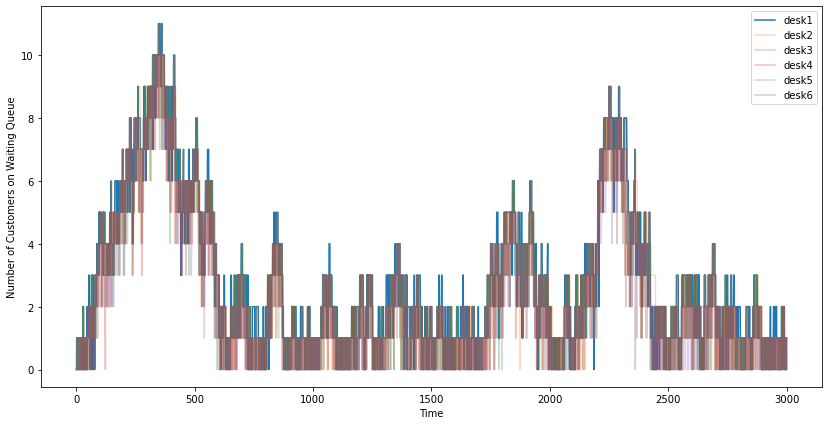

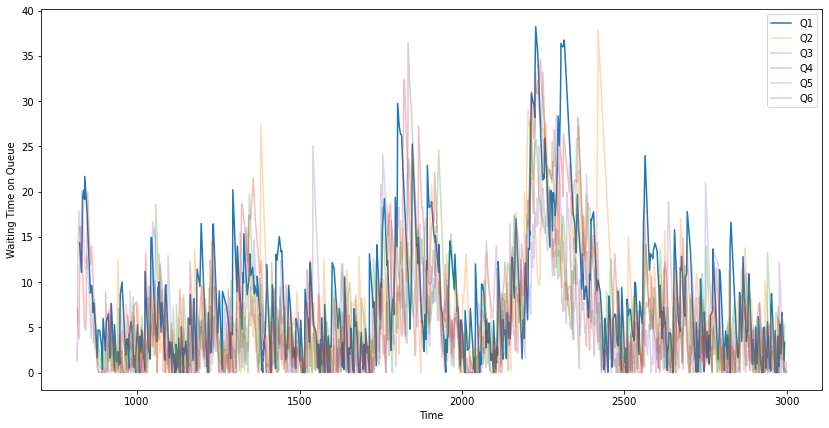

In [10]:
# Using sampling from the data

import heapq


#############################################################

class SimData:
    
    def __init__(self,time_arrive, event_type, serv_1_start, serv_1_end, serv_2_start, 
                 serv_2_end, serv_3_start, serv_3_end, serv_4_start, serv_4_end,
                 serv_5_start, serv_5_end, serv_6_start, serv_6_end):
        self.m_time_arrive = time_arrive
        self.m_event_type = event_type
        self.m_serv_1_start = serv_1_start
        self.m_serv_1_end = serv_1_end
        self.m_serv_2_start = serv_2_start
        self.m_serv_2_end = serv_2_end
        self.m_serv_3_start = serv_3_start
        self.m_serv_3_end = serv_3_end
        self.m_serv_4_start = serv_4_start
        self.m_serv_4_end = serv_4_end
        self.m_serv_5_start = serv_5_start
        self.m_serv_5_end = serv_5_end
        self.m_serv_6_start = serv_6_start
        self.m_serv_6_end = serv_6_end
        
    def Print(self):
        print(self.m_time_arrive," (", self.m_event_type,  ") : "
              ", ",self.m_serv_1_start, " - ", self.m_serv_1_end,
              ", ",self.m_serv_2_start, " - ", self.m_serv_2_end,
              ", ",self.m_serv_3_start, " - ", self.m_serv_3_end,
              ", ",self.m_serv_4_start, " - ", self.m_serv_4_end,
              ", ",self.m_serv_5_start, " - ", self.m_serv_5_end,
              ", ",self.m_serv_6_start, " - ", self.m_serv_6_end)

#############################################################

T = 3000 # simulation time

ell1 = []
ell2 = []
ell3 = []
ell4 = []
ell5 = []
ell6 = []


priorityQueue = [] 

Queue1 = []
Queue2 = []
Queue3 = []
Queue4 = []
Queue5 = []
Queue6 = []


arrive = eventData['inter_arrival_time'].values
service = eventData['service_time'].values

t_current = 0

# create first arrival
t_current = np.random.choice(arrive,1)  
data = SimData(t_current,"ARRIVAL",-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1)
heapq.heappush(priorityQueue,(t_current,data))

time_arr = []
ellq1_len = []
ellq2_len = []
ellq3_len = []
ellq4_len = []
ellq5_len = []
ellq6_len = []

serv1busy = 0
serv2busy = 0
serv3busy = 0
serv4busy = 0
serv5busy = 0
serv6busy = 0

# main loop
while(t_current<T):
    obj = heapq.heappop(priorityQueue)
    t_current = obj[0]
    event = obj[1]
    
    # record queus length
    time_arr.append(t_current)
    ellq1_len.append(len(Queue1))
    ellq2_len.append(len(Queue2))
    ellq3_len.append(len(Queue3))
    ellq4_len.append(len(Queue4))
    ellq5_len.append(len(Queue5))
    ellq6_len.append(len(Queue6))
    
    if(event.m_event_type == "ARRIVAL"):
        # handle arrival
        # schedule the next arrival
        t_next = t_current + float(np.random.choice(arrive,1)) 
        data = SimData(t_next,"ARRIVAL",-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1)
        heapq.heappush(priorityQueue,(t_next,data))
        
        if len(Queue1) == min([len(Queue1),len(Queue2),len(Queue3), len(Queue4),len(Queue5), len(Queue6)]):
            if(serv1busy==0):
                serv1busy = 1
                event.m_serv_1_start = t_current
                event.m_serv_1_end = t_current + float(np.random.choice(service,1))
                event.m_event_type = "DEPARTURE_SERV1"
                heapq.heappush(priorityQueue,(event.m_serv_1_end,event))            
            else:
                Queue1.append(event)
            continue
        elif  len(Queue2) == min([len(Queue1),len(Queue2),len(Queue3), len(Queue4),len(Queue5), len(Queue6)]):
            if(serv2busy==0):
                serv2busy = 1
                event.m_serv_2_start = t_current
                event.m_serv_2_end = t_current + float(np.random.choice(service,1))
                event.m_event_type = "DEPARTURE_SERV2"
                heapq.heappush(priorityQueue,(event.m_serv_2_end,event))            
            else:
                Queue2.append(event)
            continue
        elif  len(Queue3) == min([len(Queue1),len(Queue2),len(Queue3), len(Queue4),len(Queue5), len(Queue6)]):
            if(serv3busy==0):
                serv3busy = 1
                event.m_serv_3_start = t_current
                event.m_serv_3_end = t_current + float(np.random.choice(service,1))
                event.m_event_type = "DEPARTURE_SERV3"
                heapq.heappush(priorityQueue,(event.m_serv_3_end,event))            
            else:
                Queue3.append(event)
            continue
        elif  len(Queue4) == min([len(Queue1),len(Queue2),len(Queue3), len(Queue4),len(Queue5), len(Queue6)]):
            if(serv4busy==0):
                serv4busy = 1
                event.m_serv_4_start = t_current
                event.m_serv_4_end = t_current + float(np.random.choice(service,1))
                event.m_event_type = "DEPARTURE_SERV4"
                heapq.heappush(priorityQueue,(event.m_serv_4_end,event))            
            else:
                Queue4.append(event)
            continue
        elif  len(Queue5) == min([len(Queue1),len(Queue2),len(Queue3), len(Queue4),len(Queue5), len(Queue6)]):
            if(serv5busy==0):
                serv5busy = 1
                event.m_serv_5_start = t_current
                event.m_serv_5_end = t_current + float(np.random.choice(service,1))
                event.m_event_type = "DEPARTURE_SERV5"
                heapq.heappush(priorityQueue,(event.m_serv_5_end,event))            
            else:
                Queue5.append(event)
            continue
        elif  len(Queue6) == min([len(Queue1),len(Queue2),len(Queue3), len(Queue4),len(Queue5), len(Queue6)]):
            if(serv6busy==0):
                serv6busy = 1
                event.m_serv_6_start = t_current
                event.m_serv_6_end = t_current + float(np.random.choice(service,1))
                event.m_event_type = "DEPARTURE_SERV6"
                heapq.heappush(priorityQueue,(event.m_serv_6_end,event))            
            else:
                Queue6.append(event)
            continue
            
        
    if(event.m_event_type == "DEPARTURE_SERV1"):
        ell1.append(event) 
        serv1busy = 0
        # handle departure from the first queue
        if(len(Queue1)!=0):
            obj_wait_inq1 = Queue1.pop(0)
            obj_wait_inq1.m_serv_1_start = t_current
            obj_wait_inq1.m_event_type = "DEPARTURE_SERV1"
            obj_wait_inq1.m_serv_1_end = t_current + float(np.random.choice(service,1))
            heapq.heappush(priorityQueue,(obj_wait_inq1.m_serv_1_end,obj_wait_inq1))
            serv1busy = 1
        continue

    if(event.m_event_type == "DEPARTURE_SERV2"):
        ell2.append(event) 
        serv2busy = 0
        # handle departure from the second queue
        if(len(Queue2)!=0):
            obj_wait_inq2 = Queue2.pop(0)
            obj_wait_inq2.m_serv_2_start = t_current
            obj_wait_inq2.m_event_type = "DEPARTURE_SERV2"
            obj_wait_inq2.m_serv_2_end = t_current + float(np.random.choice(service,1))
            heapq.heappush(priorityQueue,(obj_wait_inq2.m_serv_2_end,obj_wait_inq2))
            serv2busy = 1
        continue
        
    if(event.m_event_type == "DEPARTURE_SERV3"):
        ell3.append(event) 
        serv3busy = 0
        # handle departure from the third queue
        if(len(Queue3)!=0):
            obj_wait_inq3 = Queue3.pop(0)
            obj_wait_inq3.m_serv_3_start = t_current
            obj_wait_inq3.m_event_type = "DEPARTURE_SERV3"
            obj_wait_inq3.m_serv_3_end = t_current + float(np.random.choice(service,1))
            heapq.heappush(priorityQueue,(obj_wait_inq3.m_serv_3_end,obj_wait_inq3))
            serv3busy = 1
        continue

    if(event.m_event_type == "DEPARTURE_SERV4"):
        ell4.append(event) 
        serv4busy = 0
        # handle departure from the forth queue
        if(len(Queue4)!=0):
            obj_wait_inq4 = Queue4.pop(0)
            obj_wait_inq4.m_serv_4_start = t_current
            obj_wait_inq4.m_event_type = "DEPARTURE_SERV4"
            obj_wait_inq4.m_serv_4_end = t_current + float(np.random.choice(service,1))
            heapq.heappush(priorityQueue,(obj_wait_inq4.m_serv_4_end,obj_wait_inq4))
            serv4busy = 1
        continue

    if(event.m_event_type == "DEPARTURE_SERV5"):
        ell5.append(event) 
        serv5busy = 0
        # handle departure from the fifth queue
        if(len(Queue5)!=0):
            obj_wait_inq5 = Queue5.pop(0)
            obj_wait_inq5.m_serv_5_start = t_current
            obj_wait_inq5.m_event_type = "DEPARTURE_SERV5"
            obj_wait_inq5.m_serv_5_end = t_current + float(np.random.choice(service,1))
            heapq.heappush(priorityQueue,(obj_wait_inq5.m_serv_5_end,obj_wait_inq5))
            serv5busy = 1
        continue
        
    if(event.m_event_type == "DEPARTURE_SERV6"):
        ell6.append(event) 
        serv6busy = 0
        # handle departure from the sixth queue
        if(len(Queue6)!=0):
            obj_wait_inq6 = Queue6.pop(0)
            obj_wait_inq6.m_serv_6_start = t_current
            obj_wait_inq6.m_event_type = "DEPARTURE_SERV6"
            obj_wait_inq6.m_serv_6_end = t_current + float(np.random.choice(service,1))
            heapq.heappush(priorityQueue,(obj_wait_inq6.m_serv_6_end,obj_wait_inq6))
            serv6busy = 1
        continue

        
####################################################################################
# Calculate the average waiting time in the system
####################################################################################

#Calculating burn-in period for each queue
burn_in1 = int(np.floor(0.3*len(ell1)))
burn_in2 = int(np.floor(0.3*len(ell2)))
burn_in3 = int(np.floor(0.3*len(ell3)))
burn_in4 = int(np.floor(0.3*len(ell4)))
burn_in5 = int(np.floor(0.3*len(ell5)))
burn_in6 = int(np.floor(0.3*len(ell6)))

# Calculating system time after removing burn-in period
ell_w_time1 = np.zeros(len(ell1)-burn_in1)
ell_w_time2 = np.zeros(len(ell2)-burn_in2)
ell_w_time3 = np.zeros(len(ell3)-burn_in3)
ell_w_time4 = np.zeros(len(ell4)-burn_in4)
ell_w_time5 = np.zeros(len(ell5)-burn_in5)
ell_w_time6 = np.zeros(len(ell6)-burn_in6)

ell_w_time1 = np.zeros(len(ell1)-burn_in1)
ell_w_time2 = np.zeros(len(ell2)-burn_in2)
ell_w_time3 = np.zeros(len(ell3)-burn_in3)
ell_w_time4 = np.zeros(len(ell4)-burn_in4)
ell_w_time5 = np.zeros(len(ell5)-burn_in5)
ell_w_time6 = np.zeros(len(ell6)-burn_in6)

arr1 = np.zeros(len(ell1)-burn_in1)
arr2 = np.zeros(len(ell2)-burn_in2)
arr3 = np.zeros(len(ell3)-burn_in3)
arr4 = np.zeros(len(ell4)-burn_in4)
arr5 = np.zeros(len(ell5)-burn_in5)
arr6 = np.zeros(len(ell6)-burn_in6)

for i in range(0,len(ell1)-burn_in1):
    event1 = ell1[i+burn_in1]
    wait_t1 = event1.m_serv_1_start - event1.m_time_arrive
    ell_w_time1[i] = wait_t1
    arr1[i] = event1.m_time_arrive
    
for i in range(0,len(ell2)-burn_in2):
    event2 = ell2[i+burn_in2]
    wait_t2 = event2.m_serv_2_start - event2.m_time_arrive
    ell_w_time2[i] = wait_t2
    arr2[i] = event2.m_time_arrive
    
for i in range(0,len(ell3)-burn_in3):
    event3 = ell3[i+burn_in3]
    wait_t3 = event3.m_serv_3_start - event3.m_time_arrive
    ell_w_time3[i] = wait_t3
    arr3[i] = event3.m_time_arrive
    
for i in range(0,len(ell4)-burn_in4):
    event4 = ell4[i+burn_in4]
    wait_t4 = event4.m_serv_4_start - event4.m_time_arrive
    ell_w_time4[i] = wait_t4
    arr4[i] = event4.m_time_arrive
    
for i in range(0,len(ell5)-burn_in5):
    event5 = ell5[i+burn_in5]
    wait_t5 = event5.m_serv_5_start - event5.m_time_arrive
    ell_w_time5[i] = wait_t5
    arr5[i] = event5.m_time_arrive
    
for i in range(0,len(ell6)-burn_in6):
    event6 = ell6[i+burn_in6]
    wait_t6 = event6.m_serv_6_start - event6.m_time_arrive
    ell_w_time6[i] = wait_t6
    arr6[i] = event6.m_time_arrive
    ell_w_time6[i] = wait_t6

meanBatch(ell_w_time1,1)
meanBatch(ell_w_time2,2)
meanBatch(ell_w_time3,3)
meanBatch(ell_w_time4,4)
meanBatch(ell_w_time5,5)
meanBatch(ell_w_time6,6)

#Plotting number of customers on each queue
plt.figure(figsize = (14,7))
plt.plot(time_arr,ellq1_len, label ="desk1")
plt.plot(time_arr,ellq2_len, label = 'desk2', alpha=0.3)
plt.plot(time_arr,ellq3_len, label ="desk3", alpha = 0.3)
plt.plot(time_arr,ellq4_len, label = 'desk4', alpha=0.3)
plt.plot(time_arr,ellq5_len, label ="desk5", alpha = 0.3)
plt.plot(time_arr,ellq6_len, label = 'desk6', alpha=0.3)
plt.xlabel('Time')
plt.ylabel('Number of Customers on Waiting Queue')
plt.legend()

total_wait = list(ell_w_time1) + list(ell_w_time2) + list(ell_w_time3) + list(ell_w_time4) + list(ell_w_time5) + list(ell_w_time6)
allq = 'All Queue'
meanBatch(total_wait, allq)
meanwaittime(total_wait)

plt.figure(figsize = (14,7))
plt.plot(arr1, ell_w_time1, label= 'Q1')
plt.plot(arr2, ell_w_time2, label= 'Q2', alpha = 0.3)
plt.plot(arr3, ell_w_time3, label= 'Q3', alpha = 0.3)
plt.plot(arr4, ell_w_time4, label= 'Q4', alpha = 0.3)
plt.plot(arr5, ell_w_time5, label= 'Q5', alpha = 0.3)
plt.plot(arr6, ell_w_time6, label= 'Q6', alpha = 0.3)
plt.xlabel('Time')
plt.ylabel('Waiting Time on Queue')
plt.legend()

#number of percentage customer that needs to wait less than or equal to 8 minutes
less8 = list(filter(lambda x: x <= 8, total_wait))
print('')
print('Percentage of customers waiting less than 8 minutes :', len(less8)/len(total_wait)*100, '%')

<font color = 'F2607A'>
    
# DES with #Service_Desk = 7

The average waiting time on Queue 1 is 3.3420180395295103 with 90% CI : 2.820584344892822 to 3.8634517341661985
The average waiting time on Queue 2 is 3.0642603786510283 with 90% CI : 2.6624203290397297 to 3.466100428262327
The average waiting time on Queue 3 is 3.013748652766777 with 90% CI : 2.4845308275868927 to 3.5429664779466616
The average waiting time on Queue 4 is 2.743278947404316 with 90% CI : 2.4032260839150306 to 3.0833318108936014
The average waiting time on Queue 5 is 2.7677256501072436 with 90% CI : 2.2995252422178747 to 3.2359260579966125
The average waiting time on Queue 6 is 2.7120494887332707 with 90% CI : 2.152030696938822 to 3.2720682805277193
The average waiting time on Queue 7 is 2.6463339339270844 with 90% CI : 2.103354356606064 to 3.1893135112481046
The average waiting time on Queue All Queue is 2.929503016490405 with 90% CI : 2.722935875278636 to 3.136070157702174
The average number of customers waiting less than 8 minutes is 0.9101805745554036 with range : 0.

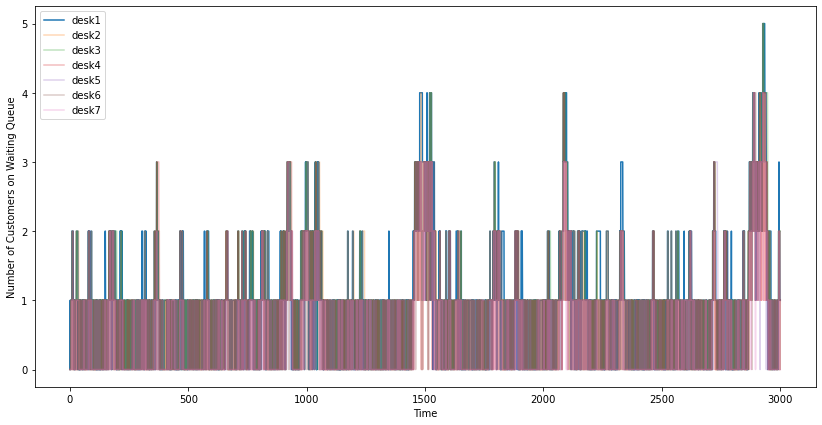

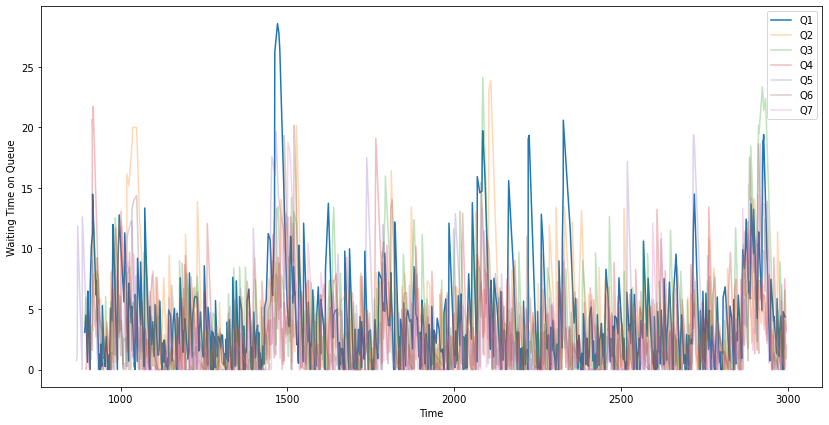

In [12]:
# Using sampling from the data

import heapq


#############################################################

class SimData:
    
    def __init__(self,time_arrive, event_type, serv_1_start, serv_1_end, serv_2_start, 
                 serv_2_end, serv_3_start, serv_3_end, serv_4_start, serv_4_end,
                 serv_5_start, serv_5_end, serv_6_start, serv_6_end, serv_7_start, serv_7_end):
        self.m_time_arrive = time_arrive
        self.m_event_type = event_type
        self.m_serv_1_start = serv_1_start
        self.m_serv_1_end = serv_1_end
        self.m_serv_2_start = serv_2_start
        self.m_serv_2_end = serv_2_end
        self.m_serv_3_start = serv_3_start
        self.m_serv_3_end = serv_3_end
        self.m_serv_4_start = serv_4_start
        self.m_serv_4_end = serv_4_end
        self.m_serv_5_start = serv_5_start
        self.m_serv_5_end = serv_5_end
        self.m_serv_6_start = serv_6_start
        self.m_serv_6_end = serv_6_end
        self.m_serv_7_start = serv_7_start
        self.m_serv_7_end = serv_7_end
        
    def Print(self):
        print(self.m_time_arrive," (", self.m_event_type,  ") : "
              ", ",self.m_serv_1_start, " - ", self.m_serv_1_end,
              ", ",self.m_serv_2_start, " - ", self.m_serv_2_end,
              ", ",self.m_serv_3_start, " - ", self.m_serv_3_end,
              ", ",self.m_serv_4_start, " - ", self.m_serv_4_end,
              ", ",self.m_serv_5_start, " - ", self.m_serv_5_end,
              ", ",self.m_serv_6_start, " - ", self.m_serv_6_end,
              ", ",self.m_serv_7_start, " - ", self.m_serv_7_end)

#############################################################

T = 3000 # simulation time

ell1 = []
ell2 = []
ell3 = []
ell4 = []
ell5 = []
ell6 = []
ell7 = []

priorityQueue = [] 

Queue1 = []
Queue2 = []
Queue3 = []
Queue4 = []
Queue5 = []
Queue6 = []
Queue7 = []

arrive = eventData['inter_arrival_time'].values
service = eventData['service_time'].values

t_current = 0

# create first arrival
t_current = np.random.choice(arrive,1)   
data = SimData(t_current,"ARRIVAL",-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1)
heapq.heappush(priorityQueue,(t_current,data))

time_arr = []
ellq1_len = []
ellq2_len = []
ellq3_len = []
ellq4_len = []
ellq5_len = []
ellq6_len = []
ellq7_len = []

serv1busy = 0
serv2busy = 0
serv3busy = 0
serv4busy = 0
serv5busy = 0
serv6busy = 0
serv7busy = 0

# main loop
while(t_current<T):
    obj = heapq.heappop(priorityQueue)
    t_current = obj[0]
    event = obj[1]
    
    # record queus length
    time_arr.append(t_current)
    ellq1_len.append(len(Queue1))
    ellq2_len.append(len(Queue2))
    ellq3_len.append(len(Queue3))
    ellq4_len.append(len(Queue4))
    ellq5_len.append(len(Queue5))
    ellq6_len.append(len(Queue6))
    ellq7_len.append(len(Queue7))
    
    if(event.m_event_type == "ARRIVAL"):
        # handle arrival
        # schedule the next arrival
        t_next = t_current + float(np.random.choice(arrive,1)) 
        data = SimData(t_next,"ARRIVAL",-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1)
        heapq.heappush(priorityQueue,(t_next,data))
        
        if len(Queue1) == min([len(Queue1),len(Queue2),len(Queue3), len(Queue4),len(Queue5), len(Queue6), len(Queue7)]):
            if(serv1busy==0):
                serv1busy = 1
                event.m_serv_1_start = t_current
                event.m_serv_1_end = t_current + float(np.random.choice(service,1))
                event.m_event_type = "DEPARTURE_SERV1"
                heapq.heappush(priorityQueue,(event.m_serv_1_end,event))            
            else:
                Queue1.append(event)
            continue
        elif  len(Queue2) == min([len(Queue1),len(Queue2),len(Queue3), len(Queue4),len(Queue5), len(Queue6), len(Queue7)]):
            if(serv2busy==0):
                serv2busy = 1
                event.m_serv_2_start = t_current
                event.m_serv_2_end = t_current + float(np.random.choice(service,1))
                event.m_event_type = "DEPARTURE_SERV2"
                heapq.heappush(priorityQueue,(event.m_serv_2_end,event))            
            else:
                Queue2.append(event)
            continue
        elif  len(Queue3) == min([len(Queue1),len(Queue2),len(Queue3), len(Queue4),len(Queue5), len(Queue6), len(Queue7)]):
            if(serv3busy==0):
                serv3busy = 1
                event.m_serv_3_start = t_current
                event.m_serv_3_end = t_current + float(np.random.choice(service,1))
                event.m_event_type = "DEPARTURE_SERV3"
                heapq.heappush(priorityQueue,(event.m_serv_3_end,event))            
            else:
                Queue3.append(event)
            continue
        elif  len(Queue4) == min([len(Queue1),len(Queue2),len(Queue3), len(Queue4),len(Queue5), len(Queue6), len(Queue7)]):
            if(serv4busy==0):
                serv4busy = 1
                event.m_serv_4_start = t_current
                event.m_serv_4_end = t_current + float(np.random.choice(service,1))
                event.m_event_type = "DEPARTURE_SERV4"
                heapq.heappush(priorityQueue,(event.m_serv_4_end,event))            
            else:
                Queue4.append(event)
            continue
        elif  len(Queue5) == min([len(Queue1),len(Queue2),len(Queue3), len(Queue4),len(Queue5), len(Queue6), len(Queue7)]):
            if(serv5busy==0):
                serv5busy = 1
                event.m_serv_5_start = t_current
                event.m_serv_5_end = t_current + float(np.random.choice(service,1))
                event.m_event_type = "DEPARTURE_SERV5"
                heapq.heappush(priorityQueue,(event.m_serv_5_end,event))            
            else:
                Queue5.append(event)
            continue
        elif  len(Queue6) == min([len(Queue1),len(Queue2),len(Queue3), len(Queue4),len(Queue5), len(Queue6), len(Queue7)]):
            if(serv6busy==0):
                serv6busy = 1
                event.m_serv_6_start = t_current
                event.m_serv_6_end = t_current + float(np.random.choice(service,1))
                event.m_event_type = "DEPARTURE_SERV6"
                heapq.heappush(priorityQueue,(event.m_serv_6_end,event))            
            else:
                Queue6.append(event)
            continue
        elif  len(Queue7) == min([len(Queue1),len(Queue2),len(Queue3), len(Queue4),len(Queue5), len(Queue6), len(Queue7)]):
            if(serv7busy==0):
                serv7busy = 1
                event.m_serv_7_start = t_current
                event.m_serv_7_end = t_current + float(np.random.choice(service,1))
                event.m_event_type = "DEPARTURE_SERV7"
                heapq.heappush(priorityQueue,(event.m_serv_7_end,event))            
            else:
                Queue7.append(event)
            continue
            
        
    if(event.m_event_type == "DEPARTURE_SERV1"):
        ell1.append(event) 
        serv1busy = 0
        # handle departure from the first queue
        if(len(Queue1)!=0):
            obj_wait_inq1 = Queue1.pop(0)
            obj_wait_inq1.m_serv_1_start = t_current
            obj_wait_inq1.m_event_type = "DEPARTURE_SERV1"
            obj_wait_inq1.m_serv_1_end = t_current + float(np.random.choice(service,1))
            heapq.heappush(priorityQueue,(obj_wait_inq1.m_serv_1_end,obj_wait_inq1))
            serv1busy = 1
        continue

    if(event.m_event_type == "DEPARTURE_SERV2"):
        ell2.append(event) 
        serv2busy = 0
        # handle departure from the second queue
        if(len(Queue2)!=0):
            obj_wait_inq2 = Queue2.pop(0)
            obj_wait_inq2.m_serv_2_start = t_current
            obj_wait_inq2.m_event_type = "DEPARTURE_SERV2"
            obj_wait_inq2.m_serv_2_end = t_current + float(np.random.choice(service,1))
            heapq.heappush(priorityQueue,(obj_wait_inq2.m_serv_2_end,obj_wait_inq2))
            serv2busy = 1
        continue
        
    if(event.m_event_type == "DEPARTURE_SERV3"):
        ell3.append(event)
        serv3busy = 0
        # handle departure from the third queue
        if(len(Queue3)!=0):
            obj_wait_inq3 = Queue3.pop(0)
            obj_wait_inq3.m_serv_3_start = t_current
            obj_wait_inq3.m_event_type = "DEPARTURE_SERV3"
            obj_wait_inq3.m_serv_3_end = t_current + float(np.random.choice(service,1))
            heapq.heappush(priorityQueue,(obj_wait_inq3.m_serv_3_end,obj_wait_inq3))
            serv3busy = 1
        continue

    if(event.m_event_type == "DEPARTURE_SERV4"):
        ell4.append(event) 
        serv4busy = 0
        # handle departure from the fourth queue
        if(len(Queue4)!=0):
            obj_wait_inq4 = Queue4.pop(0)
            obj_wait_inq4.m_serv_4_start = t_current
            obj_wait_inq4.m_event_type = "DEPARTURE_SERV4"
            obj_wait_inq4.m_serv_4_end = t_current + float(np.random.choice(service,1))
            heapq.heappush(priorityQueue,(obj_wait_inq4.m_serv_4_end,obj_wait_inq4))
            serv4busy = 1
        continue

    if(event.m_event_type == "DEPARTURE_SERV5"):
        ell5.append(event) 
        serv5busy = 0
        # handle departure from the fifth queue
        if(len(Queue5)!=0):
            obj_wait_inq5 = Queue5.pop(0)
            obj_wait_inq5.m_serv_5_start = t_current
            obj_wait_inq5.m_event_type = "DEPARTURE_SERV5"
            obj_wait_inq5.m_serv_5_end = t_current + float(np.random.choice(service,1))
            heapq.heappush(priorityQueue,(obj_wait_inq5.m_serv_5_end,obj_wait_inq5))
            serv5busy = 1
        continue
        
    if(event.m_event_type == "DEPARTURE_SERV6"):
        ell6.append(event) 
        serv6busy = 0
        # handle departure from the sixth queue
        if(len(Queue6)!=0):
            obj_wait_inq6 = Queue6.pop(0)
            obj_wait_inq6.m_serv_6_start = t_current
            obj_wait_inq6.m_event_type = "DEPARTURE_SERV6"
            obj_wait_inq6.m_serv_6_end = t_current + float(np.random.choice(service,1))
            heapq.heappush(priorityQueue,(obj_wait_inq6.m_serv_6_end,obj_wait_inq6))
            serv6busy = 1
        continue

    if(event.m_event_type == "DEPARTURE_SERV7"):
        ell7.append(event) 
        serv7busy = 0
        # handle departure from the seventh queue
        if(len(Queue7)!=0):
            obj_wait_inq7 = Queue7.pop(0)
            obj_wait_inq7.m_serv_7_start = t_current
            obj_wait_inq7.m_event_type = "DEPARTURE_SERV7"
            obj_wait_inq7.m_serv_7_end = t_current + float(np.random.choice(service,1))
            heapq.heappush(priorityQueue,(obj_wait_inq7.m_serv_7_end,obj_wait_inq7))
            serv7busy = 1
        continue
        
####################################################################################
# Calculate the average waiting time in the system
####################################################################################

burn_in1 = int(np.floor(0.3*len(ell1)))
burn_in2 = int(np.floor(0.3*len(ell2)))
burn_in3 = int(np.floor(0.3*len(ell3)))
burn_in4 = int(np.floor(0.3*len(ell4)))
burn_in5 = int(np.floor(0.3*len(ell5)))
burn_in6 = int(np.floor(0.3*len(ell6)))
burn_in7 = int(np.floor(0.3*len(ell7)))

ell_w_time1 = np.zeros(len(ell1)-burn_in1)
ell_w_time2 = np.zeros(len(ell2)-burn_in2)
ell_w_time3 = np.zeros(len(ell3)-burn_in3)
ell_w_time4 = np.zeros(len(ell4)-burn_in4)
ell_w_time5 = np.zeros(len(ell5)-burn_in5)
ell_w_time6 = np.zeros(len(ell6)-burn_in6)
ell_w_time7 = np.zeros(len(ell7)-burn_in7)

arr1 = np.zeros(len(ell1)-burn_in1)
arr2 = np.zeros(len(ell2)-burn_in2)
arr3 = np.zeros(len(ell3)-burn_in3)
arr4 = np.zeros(len(ell4)-burn_in4)
arr5 = np.zeros(len(ell5)-burn_in5)
arr6 = np.zeros(len(ell6)-burn_in6)
arr7 = np.zeros(len(ell7)-burn_in7)

for i in range(0,len(ell1)-burn_in1):
    event1 = ell1[i+burn_in1]
    wait_t1 = event1.m_serv_1_start - event1.m_time_arrive
    ell_w_time1[i] = wait_t1
    arr1[i] = event1.m_time_arrive
    
for i in range(0,len(ell2)-burn_in2):
    event2 = ell2[i+burn_in2]
    wait_t2 = event2.m_serv_2_start - event2.m_time_arrive
    ell_w_time2[i] = wait_t2
    arr2[i] = event2.m_time_arrive
    
for i in range(0,len(ell3)-burn_in3):
    event3 = ell3[i+burn_in3]
    wait_t3 = event3.m_serv_3_start - event3.m_time_arrive
    ell_w_time3[i] = wait_t3
    arr3[i] = event3.m_time_arrive
    
for i in range(0,len(ell4)-burn_in4):
    event4 = ell4[i+burn_in4]
    wait_t4 = event4.m_serv_4_start - event4.m_time_arrive
    ell_w_time4[i] = wait_t4
    arr4[i] = event4.m_time_arrive
    
for i in range(0,len(ell5)-burn_in5):
    event5 = ell5[i+burn_in5]
    wait_t5 = event5.m_serv_5_start - event5.m_time_arrive
    ell_w_time5[i] = wait_t5
    arr5[i] = event5.m_time_arrive
    
for i in range(0,len(ell6)-burn_in6):
    event6 = ell6[i+burn_in6]
    wait_t6 = event6.m_serv_6_start - event6.m_time_arrive
    ell_w_time6[i] = wait_t6
    arr6[i] = event6.m_time_arrive
    
for i in range(0,len(ell7)-burn_in7):
    event7 = ell7[i+burn_in7]
    wait_t7 = event7.m_serv_7_start - event7.m_time_arrive
    ell_w_time7[i] = wait_t7
    arr7[i] = event7.m_time_arrive

meanBatch(ell_w_time1,1)
meanBatch(ell_w_time2,2)
meanBatch(ell_w_time3,3)
meanBatch(ell_w_time4,4)
meanBatch(ell_w_time5,5)
meanBatch(ell_w_time6,6)
meanBatch(ell_w_time7,7)

plt.figure(figsize = (14,7))
plt.plot(time_arr,ellq1_len, label="desk1")
plt.plot(time_arr,ellq2_len, label = 'desk2', alpha=0.3)
plt.plot(time_arr,ellq3_len, label="desk3", alpha = 0.3)
plt.plot(time_arr,ellq4_len, label = 'desk4', alpha=0.3)
plt.plot(time_arr,ellq5_len, label="desk5", alpha = 0.3)
plt.plot(time_arr,ellq6_len, label = 'desk6', alpha=0.3)
plt.plot(time_arr,ellq7_len, label="desk7", alpha = 0.3)
plt.xlabel('Time')
plt.ylabel('Number of Customers on Waiting Queue')
plt.legend()


total_wait = list(ell_w_time1) + list(ell_w_time2) + list(ell_w_time3) + list(ell_w_time4) + list(ell_w_time5) + list(ell_w_time6) + list(ell_w_time7)
allq = 'All Queue'
meanBatch(total_wait, allq)
meanwaittime(total_wait)

plt.figure(figsize = (14,7))
plt.plot(arr1, ell_w_time1, label= 'Q1')
plt.plot(arr2, ell_w_time2, label= 'Q2', alpha = 0.3)
plt.plot(arr3, ell_w_time3, label= 'Q3', alpha = 0.3)
plt.plot(arr4, ell_w_time4, label= 'Q4', alpha = 0.3)
plt.plot(arr5, ell_w_time5, label= 'Q5', alpha = 0.3)
plt.plot(arr6, ell_w_time6, label= 'Q6', alpha = 0.3)
plt.plot(arr7, ell_w_time7, label= 'Q7', alpha = 0.3)
plt.xlabel('Time')
plt.ylabel('Waiting Time on Queue')
plt.legend()

We can see that number of waiting time and number of customers on each queue become steady when number of desks are 6 and 7. However, Air Space wants to ensure the 90% of the customers do not have to wait more than 8 minutes in a waiting queue. Hence, I calculated the mean and 90% confidence interval of waiting time and number of customers that have less than 8 minutes que waiting time using batch means method. Number of batches is set to 50. Before applying the batch means method, I discarded the system burn-in, namely the first 30% of each queue. 

The average waiting time of customers in the queue is 8.69 minutes and the percentage of customers that have waiting time in queue less than 8 minutes is only 55.79%. When number of desks equal to 7, the average waiting time of customers is 2.5 minutes and the percentage of customers that have waiting time in queue less or equal to 8 minutes is 93.6%. Hence, 7 desks is the solution of Air Space’s problem.